# Introduction to Audio Processing and Feature Extraction
### Deepanshi Shokeen 

Reference : https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

In [1]:
import librosa
audio_path = '/Users/deepanshishokeen/Desktop/careerdevelopment/IRMAS-sample/Training/vio/001__[vio][nod][cou_fol]2194__1.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(66150,) 22050


The sample rate is the number of samples of audio carried per second, measured in Hz or kHz.

In [2]:
#This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. 
#We can change this behaviour to resample at 44.1KHz
librosa.load(audio_path, sr=44100)

(array([0.05551147, 0.05773926, 0.05281067, ..., 0.16815186, 0.15602112,
        0.14503479], dtype=float32), 44100)

In [3]:
#or to disable resampling
librosa.load(audio_path, sr=None)


(array([0.05551147, 0.05773926, 0.05281067, ..., 0.16815186, 0.15602112,
        0.14503479], dtype=float32), 44100)

In [4]:
import IPython.display as ipd
ipd.Audio(audio_path)

## Visualizing Audio

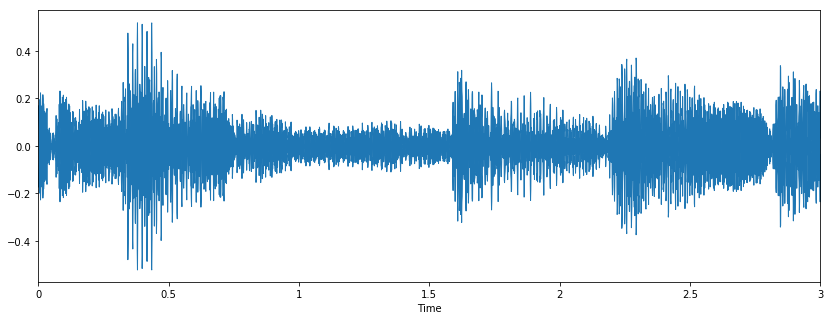

In [5]:
#plot of the amplitude v/s time
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Spectrogram
It is a visual representation of the spectrum of frequencies of sound or other signals asthey vary with time

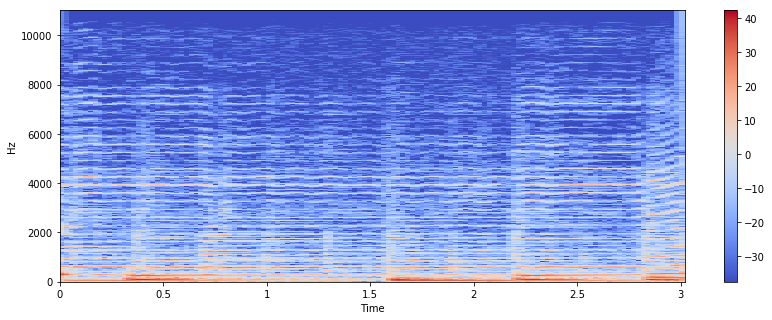

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))#converting complex no. to real-> abs()
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [8]:
#Writing audio
librosa.output.write_wav('example.wav', x, sr)

In [9]:
t='example.wav' 
ipd.Audio(t)

In [13]:
#creating audio signal
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array

#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)


In [12]:
t='tone_220.wav' 
ipd.Audio(t)

## Extracting Features
**1. Zero Crossing Rate:** is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

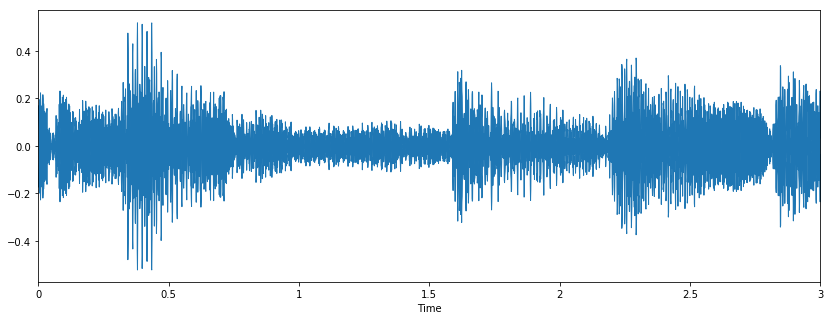

In [16]:
#Zero cossing rate
# Load the signal

audio_path = '/Users/deepanshishokeen/Desktop/careerdevelopment/IRMAS-sample/Training/vio/001__[vio][nod][cou_fol]2194__1.wav'
x , sr = librosa.load(audio_path)

#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)



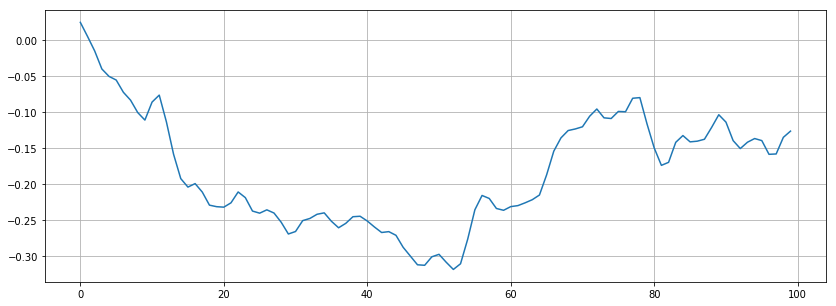

In [17]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [18]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

1


**2. Spectral Centroid:** It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. Consider two songs, one from a blues genre and the other belonging to metal. Now as compared to the blues genre song which is the same throughout its length, the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal song would be towards its end.

In [23]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(130,)

In [24]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [28]:
# Normalising the spectral centroid for visualisation
import sklearn
from sklearn import preprocessing# can be used for scaling
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

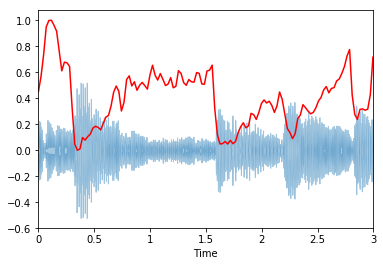

In [29]:
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

There is a rise in the spectral centroid in the starting.



**3. Spectral Rolloff:** It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

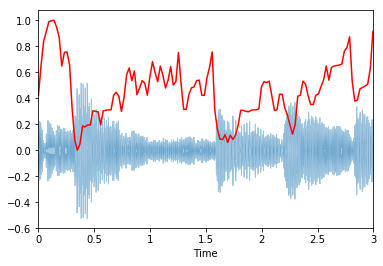

In [30]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

**4. Mel-Frequency Cepstral Coeffcients:** The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

x, fs = librosa.load('../simple_loop.wav')
librosa.display.waveplot(x, sr=sr)

mfccs = librosa.feature.mfcc(x, sr=fs)
print mfccs.shape
(20, 97)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


We can also perform feature scaling such that each coefficient dimension has zero mean and unit variance:

import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

**5. Chroma Frequencies :** Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

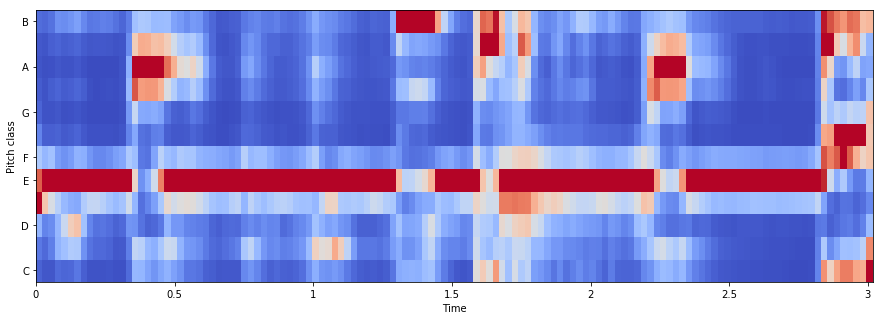

In [31]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')